# 1.1.3

1.6099999999999997 -3.3999999999999995


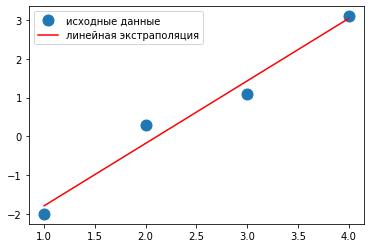

[-6.31612117 -5.11388659 -4.09551519 -2.31474146 -1.87558222 -0.76658857
  0.87393217  1.42640944  2.35652678  3.3672058   4.82738898  6.2108508 ]
[35.90509947 24.2970744  14.78963474  7.07066243  2.45580343  0.32875221
  0.3089014   3.02915921  7.52174485 14.12753745 23.99626646 35.68548949]
[-6.23848482 -4.64483555 -3.37465231 -2.48744142 -2.11927781 -0.9017688
  0.37077329  1.41946965  2.3771445   4.26445517  4.68224032  6.36126763]

[-2.16234818e+02 -1.18745304e+02 -5.60072713e+01 -2.03851078e+01
 -4.67704651e+00 -1.54576849e-01  1.27163822e-01  4.67700926e+00
  2.03315017e+01  5.54963462e+01  1.18334120e+02  2.16019922e+02]


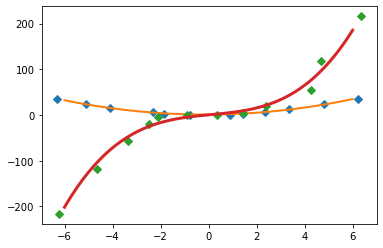

In [1]:
#эктраполяция 1 степени
import numpy as np
x=np.array([1,2,3,4])
y=np.array([-2,0.3,1.1,3.1])
A=np.vstack([x,np.ones(len(x))]).T
m,c=np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='исходные данные',markersize=11)
plt.plot(x, m*x+c,'r',label='линейная экстраполяция')
plt.legend()
plt.show()
#эктраполяция 2 степени
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x=linspace(-6,6,12)
y=x**2+delta*(rand(12)-0.5)
x+=delta*(rand(12)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt',float, sep='\n')
y=fromfile('y_data.txt',float, sep='\n')
print(x)
print(y)
m=vstack((x**2,x,ones(12))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-6,6,102)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')
#эктраполяция 3 степени
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x=linspace(-6,6,12)
y=x**3+delta*(rand(12)-0.5)
x+=delta*(rand(12)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
x=fromfile('x_data.txt',float, sep='\n')
y=fromfile('y_data.txt',float, sep='\n')
print(f'{x}\n')
print(y)
m=vstack((x**3,x**2,x,ones(12))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-6,6,102)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# 1.1.5

0.0002448932794167926
0.1314976626387626


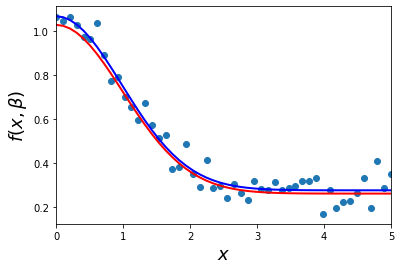

[0.25736265 0.7795282 ]
0.00012289585308748448
0.10806359795702418


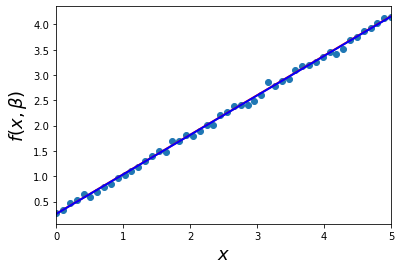

[0.26101444 0.75732087 0.553404  ]
0.00011521308618115056
0.09607565044224006


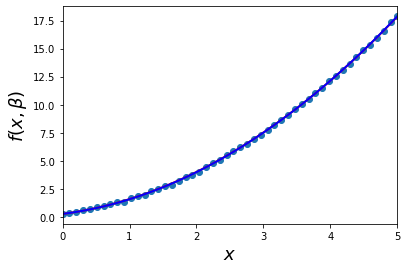

[1.99797439 2.99793387]
5.1559227376588815e-05
0.11922768938756029


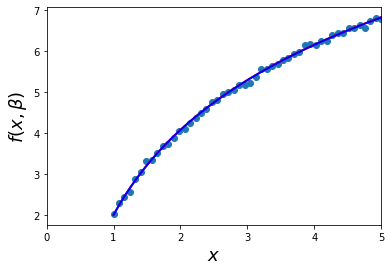

In [2]:
#Добавим шума в данные,сделанные по функцииf(x,b) с коэфициентами b=(0.26,0.77,0.51)
beta = (0.26,0.77,0.51)
def f (x,b0,b1,b2) :
    return b0+b1*np.exp(-b2*x**2)
#Зададим массив точек xi
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
xdata = np.linspace(0,5,50)
#создаем теоритически правильные значения точек yi (без шума)
y=f(xdata,*beta)
#зашумляем эти данные
ydata = y + 0.05*np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()
#решение1
#Добавим шума в данные,сделанные по функции f(x,b) с коэфиентами b=(0.26,0.78)
beta =(0.26,0.78)
def f(x,b0,b1):
    return b0+b1*x
#зададим массив точек xi
import numpy as np
xdata=np.linspace(0,5,50)
#создаем теоретически правильные значения точек yi(без шума)
y=f(xdata,*beta)
#зашумляем данные
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#вЫчислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

#решение2
#Добавим шума в данные,сделанные по функции f(x,b) с коэфиентами b=(0.26,0.77,0.55)
beta =(0.26,0.77,0.55)
def f(x,b0,b1,b2):
    return b0+b1*x+b2*x*x
#зададим массив точек xi
import numpy as np
xdata=np.linspace(0,5,50)
#создаем теоретически правильные значения точек yi(без шума)
y=f(xdata,*beta)
#зашумляем данные
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#вЫчислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

#решение3
#Добавим шума в данные,сделанные по функции f(x,b) с коэфиентами b=(2,3)
beta =(2,3)
def f(x,b0,b1):
    return b0+b1*np.log(x)
#зададим массив точек xi
import numpy as np
xdata=np.linspace(1,5,50)
#создаем теоретически правильные значения точек yi(без шума)
y=f(xdata,*beta)
#зашумляем данные
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#вЫчислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

# 1.2.1

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.099150628186
[9312.57512673]


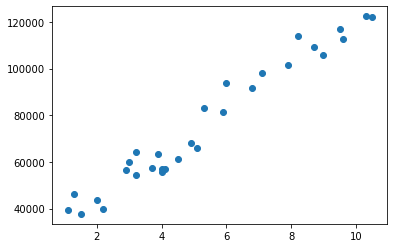

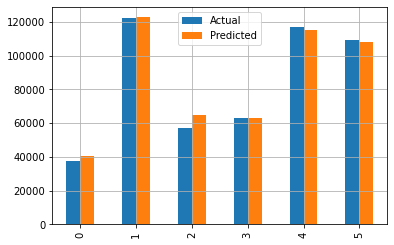

In [3]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset=pd.read_csv(url)
print(dataset.head())
plt.scatter(dataset['YearsExperience'], dataset['Salary'])

x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(x)
print(y)
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=0)
reg=LinearRegression()
reg.fit(xtr,ytr)
print(reg.intercept_)
print(reg.coef_)

#прогноз
ypr=reg.predict(xte)
df=pd.DataFrame({'Actual':yte,'Predicted':ypr})
df.plot(kind='bar')
plt.grid()
plt.show()

# 1.3.2

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset=pd.read_csv(url)

print(dataset.head())

x=dataset[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=dataset['quality']
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=0)
reg=LinearRegression()
reg.fit(xtr,ytr)

coeff_df=pd.DataFrame(reg.coef_, x.columns,columns=['Coefficient'])
print(reg.intercept_)
print(reg.coef_)

#прогноз
ypr=reg.predict(xte)
df=pd.DataFrame({'Actual':yte,'Predicted':ypr})
print(df)

print('Mean Squared Error:', metrics.mean_squared_error(yte,ypr))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 